Apply Model to some inputs

Import packages

In [53]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

Some verifications

Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [54]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


Process & Prepare data
Flattening Input data:
Input data (x_train[i]) should be a vector of real values
- From shape (60000, 28, 28) to shape (60000, 28 * 28)
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [55]:
#use numpy reshape
x_train = np.reshape(x_train, (60000, 28 * 28)).astype('float32')
x_valid = np.reshape(x_valid, (10000, 28 * 28)).astype('float32')

In [56]:
print(x_train.shape)
print(x_valid.shape)

(60000, 784)
(10000, 784)


Select one image


In [58]:
#print(x_train[0])
print(y_train[0])

5


Load Model 

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Define Neural Network Architecture
Using Keras API

In [37]:
# Sequential: model of type sequential (layer n can pass information only to layer n+1)
model = Sequential()
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": []}, "keras_version": "2.2.4-tf", "backend": "tensorflow"}'

In [38]:
#Define activations
activation = keras.activations.relu
softmax = keras.activations.softmax

#define loss function: Cross entropy
loss = keras.losses.categorical_crossentropy

#define metrics
metrics = [keras.metrics.Accuracy()]

#define optimizer
sgd=keras.optimizers.SGD(lr=0.1)
tf.print(sgd.lr)


0.1


In [39]:
#define First layer
inputSize = 28 * 28 # size of input vector
nbUnits = 64 #Number of input layer units (artificial neuron)
kernel_initializer='random_uniform'
bias_initializer='zeros'

firstLayer = Dense(nbUnits, activation=  activation, input_shape=(inputSize,), 
kernel_initializer='random_uniform',
bias_initializer='zeros')

tf.print(firstLayer.kernel_initializer)

model.add(firstLayer)

secondlayer = Dense(nbUnits, activation=  activation)
model.add(secondlayer)

In [40]:
#define Output layer
 
outputUnits = 10 #Number of output layer units (artificial neuron)
# output shape will be inferred
outputLayer = Dense(outputUnits, activation=  softmax)
model.add(outputLayer)

In [41]:
#compile Model
model.compile(loss=loss, 
         optimizer=sgd,
         metrics=['accuracy'])

In [42]:
# print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


TensorBoard

In [43]:
from tensorflow.keras.callbacks import TensorBoard
import os 
import datetime
folder="logs/crossEntropyReLu2LayersWI"
log_dir=
if not os.path.exists(folder):
   os.mkdir(folder)
log_dir = folder + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
os.mkdir(log_dir)
 
tensorBoard = TensorBoard(log_dir, histogram_freq=1,profile_batch = 100000000)

logs/crossEntropyReLu2LayersWI/20200229-143718


In [44]:
# Train
batch_size = 128
nb_epoch = 20
history=model.fit(x_train, y_train, batch_size= batch_size, epochs = nb_epoch, verbose=1, validation_data=(x_valid, y_valid),
callbacks=[tensorBoard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4716 - accuracy: 0.8670 - val_loss: 0.2642 - val_accuracy: 0.9209
Epoch 2/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2363 - accuracy: 0.9313 - val_loss: 0.2012 - val_accuracy: 0.9413
Epoch 3/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1809 - accuracy: 0.9473 - val_loss: 0.1818 - val_accuracy: 0.9448
Epoch 4/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1470 - accuracy: 0.9568 - val_loss: 0.1334 - val_accuracy: 0.9606
Epoch 5/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1247 - accuracy: 0.9639 - val_loss: 0.1324 - val_accuracy: 0.9605
Epoch 6/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1081 - accuracy: 0.9690 - val_loss: 0.1124 - val_accuracy: 0.9662
Epoch 7/20
60000/60000 [==============================] 

Save Model

In [52]:
# serialize model to JSON
print(log_dir)
model_json = model.to_json()
with open(log_dir + "/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save(log_dir + "/model.h5")

logs/crossEntropyReLu2LayersWI/20200229-143718


Plot History

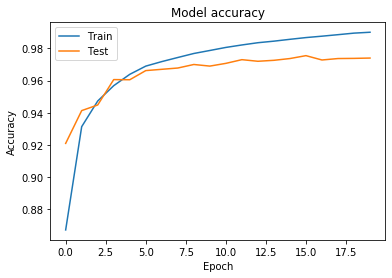

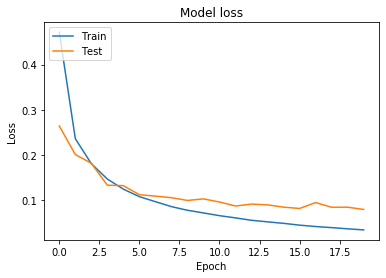

In [45]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [46]:
# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [47]:
json = model.to_json()
tf.print(json)

{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_8", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_na

End